# Multiple Linear Regression

1.Performing EDA for given dataset

In [3]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error,mean_absolute_error,classification_report
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso, Ridge


In [4]:
data=pd.read_csv(r"C:\Users\dorkar\Documents\conda\DS\MLR\ToyotaCorolla - MLR.csv")
data

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [5]:
data.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [6]:
data.shape

(1436, 11)

In [7]:
data.columns

Index(['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc',
       'Doors', 'Cylinders', 'Gears', 'Weight'],
      dtype='object')

In [8]:
data.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [10]:
data[data.duplicated()]

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
113,24950,8,13253,Diesel,116,0,2000,5,4,5,1320


In [11]:
data.drop_duplicates(inplace=True)

In [12]:
data[data.duplicated()]

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight


In [13]:
correlation=data.corr(numeric_only=True)
correlation

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.033928,0.124375,0.183604,NaN,0.063831,0.575869
Age_08_04,-0.876273,1.000000,0.504575,-0.155293,0.031354,-0.096549,-0.146929,NaN,-0.005629,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,-0.082168,0.103822,-0.035193,NaN,0.014890,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.013313,0.035207,0.091803,NaN,0.209642,0.087143
Automatic,0.033928,0.031354,-0.082168,0.013313,1.000000,0.066934,-0.027492,NaN,-0.098582,0.058499
cc,0.124375,-0.096549,0.103822,0.035207,0.066934,1.000000,0.079254,NaN,0.014732,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,-0.027492,0.079254,1.000000,NaN,-0.160101,0.301734
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,0.063831,-0.005629,0.014890,0.209642,-0.098582,0.014732,-0.160101,NaN,1.000000,0.021238
Weight,0.575869,-0.466484,-0.023969,0.087143,0.058499,0.335077,0.301734,NaN,0.021238,1.000000


<Axes: >

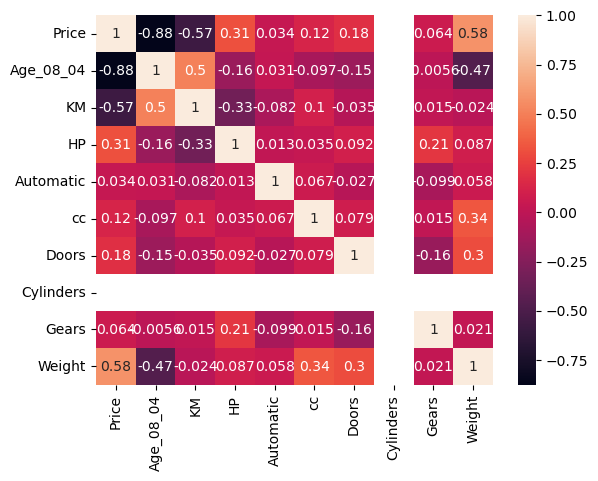

In [14]:
sns.heatmap(correlation,annot=True)

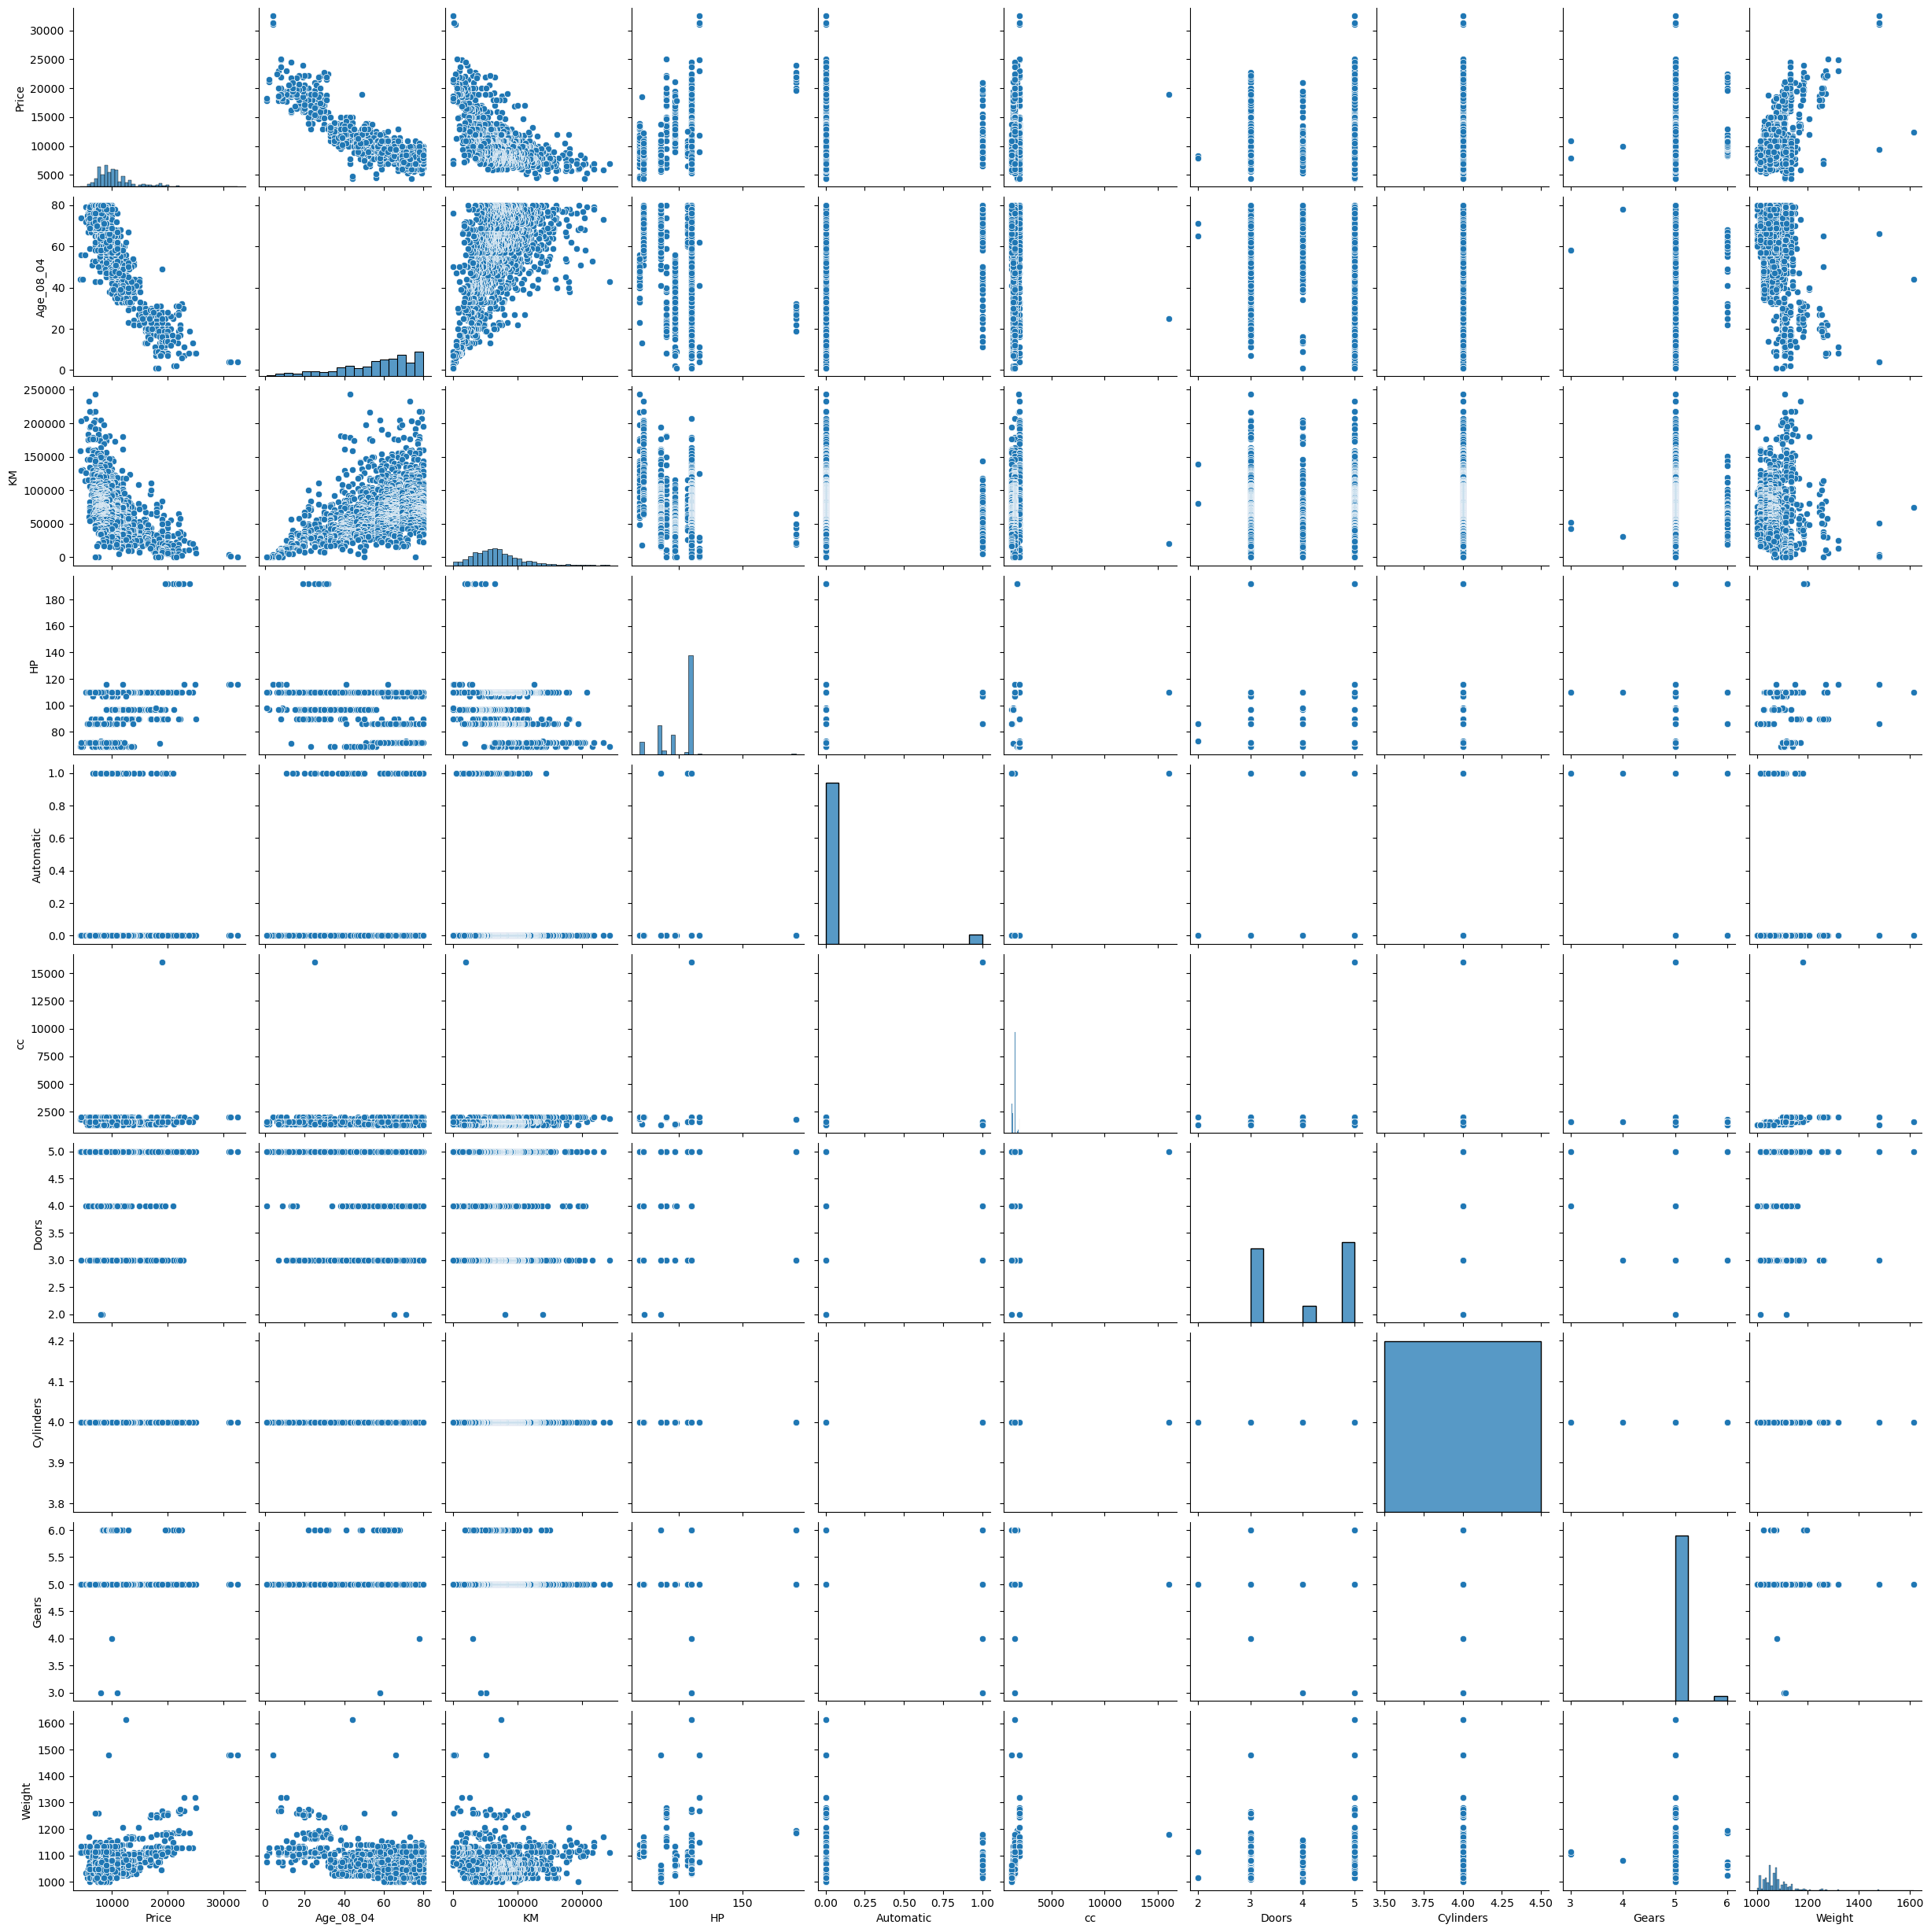

In [15]:
sns.pairplot(data)

Data Visualization

array([[<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Age_08_04'}>,
        <Axes: title={'center': 'KM'}>],
       [<Axes: title={'center': 'HP'}>,
        <Axes: title={'center': 'Automatic'}>,
        <Axes: title={'center': 'cc'}>],
       [<Axes: title={'center': 'Doors'}>,
        <Axes: title={'center': 'Cylinders'}>,
        <Axes: title={'center': 'Gears'}>],
       [<Axes: title={'center': 'Weight'}>, <Axes: >, <Axes: >]],
      dtype=object)

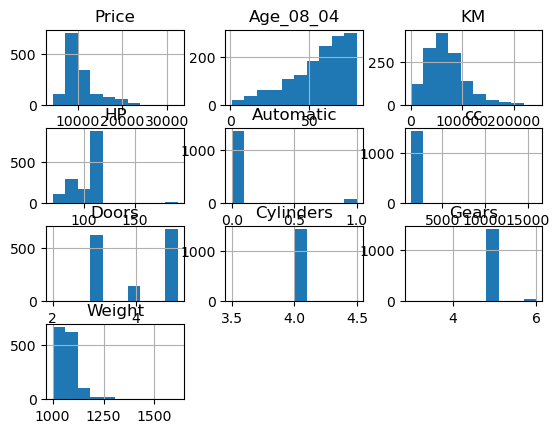

In [17]:
data.hist()

<Axes: xlabel='Fuel_Type', ylabel='count'>

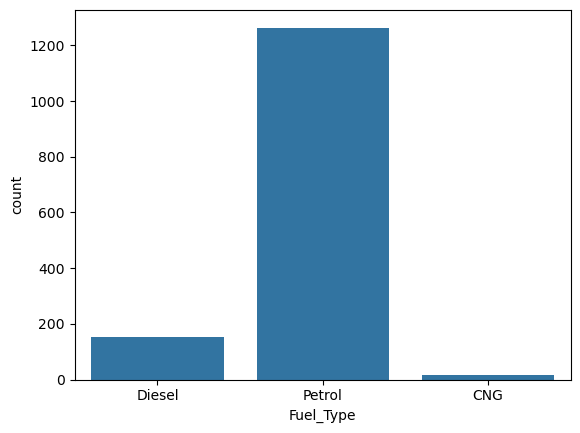

In [18]:
sns.countplot(x='Fuel_Type',data=data)

<Axes: >

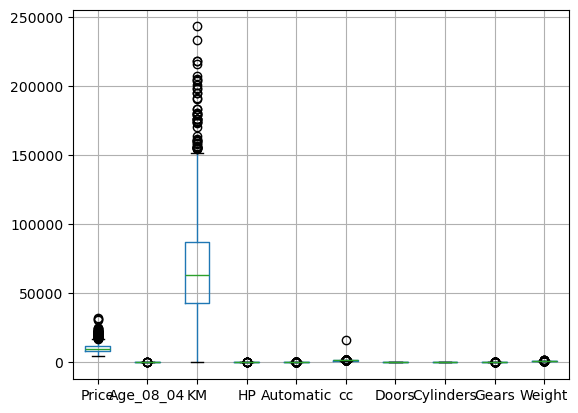

In [19]:
data.boxplot()

Removing outlier

In [25]:
# Detect outliers using IQR method
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Define a function to identify outliers
def detect_outliers_iqr(data):
    outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))
    return outliers

# Apply the function to the dataframe
outliers = detect_outliers_iqr(data)

# Print outliers summary
print(outliers.sum()/len(data)*100)


TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [27]:
# Remove outliers from the dataframe
data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]
data

NameError: name 'Q1' is not defined

<Axes: >

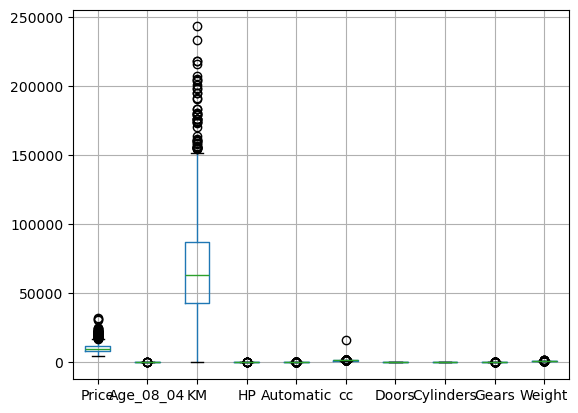

In [29]:
data.boxplot()

Data Encoding : categorical to numerical

In [32]:
data.dtypes=='object'

Price        False
Age_08_04    False
KM           False
Fuel_Type     True
HP           False
Automatic    False
cc           False
Doors        False
Cylinders    False
Gears        False
Weight       False
dtype: bool

In [34]:
label=LabelEncoder()
data['Fuel_Type']=label.fit_transform(data['Fuel_Type'])
data

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,1,90,0,2000,3,4,5,1165
1,13750,23,72937,1,90,0,2000,3,4,5,1165
2,13950,24,41711,1,90,0,2000,3,4,5,1165
3,14950,26,48000,1,90,0,2000,3,4,5,1165
4,13750,30,38500,1,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,2,86,0,1300,3,4,5,1025
1432,10845,72,19000,2,86,0,1300,3,4,5,1015
1433,8500,71,17016,2,86,0,1300,3,4,5,1015
1434,7250,70,16916,2,86,0,1300,3,4,5,1015


2.Split the dataset into training and testing sets (e.g., 80% training, 20% testing).

In [37]:
x=data.drop(['Price'],axis=1)
y=data['Price']
x,y

(      Age_08_04     KM  Fuel_Type   HP  Automatic    cc  Doors  Cylinders  \
 0            23  46986          1   90          0  2000      3          4   
 1            23  72937          1   90          0  2000      3          4   
 2            24  41711          1   90          0  2000      3          4   
 3            26  48000          1   90          0  2000      3          4   
 4            30  38500          1   90          0  2000      3          4   
 ...         ...    ...        ...  ...        ...   ...    ...        ...   
 1431         69  20544          2   86          0  1300      3          4   
 1432         72  19000          2   86          0  1300      3          4   
 1433         71  17016          2   86          0  1300      3          4   
 1434         70  16916          2   86          0  1300      3          4   
 1435         76      1          2  110          0  1600      5          4   
 
       Gears  Weight  
 0         5    1165  
 1         5    

In [39]:
data.reset_index(inplace=True)
data

,index,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,0,13500,23,46986,1,90,0,2000,3,4,5,1165
1,1,13750,23,72937,1,90,0,2000,3,4,5,1165
2,2,13950,24,41711,1,90,0,2000,3,4,5,1165
3,3,14950,26,48000,1,90,0,2000,3,4,5,1165
4,4,13750,30,38500,1,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...,...
1430,1431,7500,69,20544,2,86,0,1300,3,4,5,1025
1431,1432,10845,72,19000,2,86,0,1300,3,4,5,1015
1432,1433,8500,71,17016,2,86,0,1300,3,4,5,1015
1433,1434,7250,70,16916,2,86,0,1300,3,4,5,1015


In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [43]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1148, 10), (287, 10), (1148,), (287,))

Standardization

In [46]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

3.Applying MLR to training dataset

create model and fit it

In [50]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [52]:
r_sq=model.score(x_train,y_train)
print("coefficient of determination:",r_sq)

coefficient of determination: 0.8694838434310366


In [54]:
print("Intercept:",model.intercept_)

Intercept: 10727.046167247385


In [56]:
print("coefficients:",model.coef_)

coefficients: [-2.27802244e+03 -6.35536071e+02  3.14404687e+02  3.54509019e+02
  8.35614688e+01 -4.49628878e+01 -5.74712945e+01 -2.84217094e-14
  7.96279949e+01  1.19494882e+03]


In [58]:
y_pred=model.predict(x_test)
print("Predicted response:",y_pred)

Predicted response: [10696.89851246 10324.62616281  8987.28502681  9433.54088118
  8646.86632649  8515.94505436  8193.82241073  8292.50333528
 12048.23201204 12681.70936689  9370.29827277  9380.04506528
 13291.46784253 12535.98570129  8903.04591891 11688.11158523
 12479.00870416 17024.71566113 10002.34911666 11736.92769559
 11766.45034232 18268.77288961  9789.21787321 10625.50854046
  7508.29622807 16065.63154128  7186.35492702  8040.85937386
 15710.03059348 13928.66579233  8181.14147961 10216.94943
 10113.22350624 10217.96785357 10112.56763492  8560.7696616
  8917.39918652 10078.35719944 16449.0251761  10782.0814977
  8888.40482111  9598.55488545 10077.053495    8556.53461727
 10584.87754533 17656.20027167 10547.82704936  9089.59126177
 10794.62932963 12773.06399865 13042.97781655  6409.99652485
 14966.34226425 16363.47612101  6169.06911134  7560.38068932
 11472.09061094 11799.31701429 16071.88099843 18975.6734791
 12421.52340038  7699.34364689  8653.49444882 13197.13128511
 12369.175

In [60]:
print(r2_score(y_pred,y_test))

0.8271982511643858


In [62]:
print('MSE',y_pred,y_test)

MSE [10696.89851246 10324.62616281  8987.28502681  9433.54088118
  8646.86632649  8515.94505436  8193.82241073  8292.50333528
 12048.23201204 12681.70936689  9370.29827277  9380.04506528
 13291.46784253 12535.98570129  8903.04591891 11688.11158523
 12479.00870416 17024.71566113 10002.34911666 11736.92769559
 11766.45034232 18268.77288961  9789.21787321 10625.50854046
  7508.29622807 16065.63154128  7186.35492702  8040.85937386
 15710.03059348 13928.66579233  8181.14147961 10216.94943
 10113.22350624 10217.96785357 10112.56763492  8560.7696616
  8917.39918652 10078.35719944 16449.0251761  10782.0814977
  8888.40482111  9598.55488545 10077.053495    8556.53461727
 10584.87754533 17656.20027167 10547.82704936  9089.59126177
 10794.62932963 12773.06399865 13042.97781655  6409.99652485
 14966.34226425 16363.47612101  6169.06911134  7560.38068932
 11472.09061094 11799.31701429 16071.88099843 18975.6734791
 12421.52340038  7699.34364689  8653.49444882 13197.13128511
 12369.17549834  6846.7805

In [64]:
print('MAE',y_pred,y_test)

MAE [10696.89851246 10324.62616281  8987.28502681  9433.54088118
  8646.86632649  8515.94505436  8193.82241073  8292.50333528
 12048.23201204 12681.70936689  9370.29827277  9380.04506528
 13291.46784253 12535.98570129  8903.04591891 11688.11158523
 12479.00870416 17024.71566113 10002.34911666 11736.92769559
 11766.45034232 18268.77288961  9789.21787321 10625.50854046
  7508.29622807 16065.63154128  7186.35492702  8040.85937386
 15710.03059348 13928.66579233  8181.14147961 10216.94943
 10113.22350624 10217.96785357 10112.56763492  8560.7696616
  8917.39918652 10078.35719944 16449.0251761  10782.0814977
  8888.40482111  9598.55488545 10077.053495    8556.53461727
 10584.87754533 17656.20027167 10547.82704936  9089.59126177
 10794.62932963 12773.06399865 13042.97781655  6409.99652485
 14966.34226425 16363.47612101  6169.06911134  7560.38068932
 11472.09061094 11799.31701429 16071.88099843 18975.6734791
 12421.52340038  7699.34364689  8653.49444882 13197.13128511
 12369.17549834  6846.7805

In [66]:
residual=y_test-y_pred
residual

753     -746.898512
858    -2329.626163
630    -1487.285027
1412     516.459119
975      303.133674
           ...     
1113   -1524.576460
175      671.224752
1428     320.197556
298     -168.147188
1126     308.718765
Name: Price, Length: 287, dtype: float64

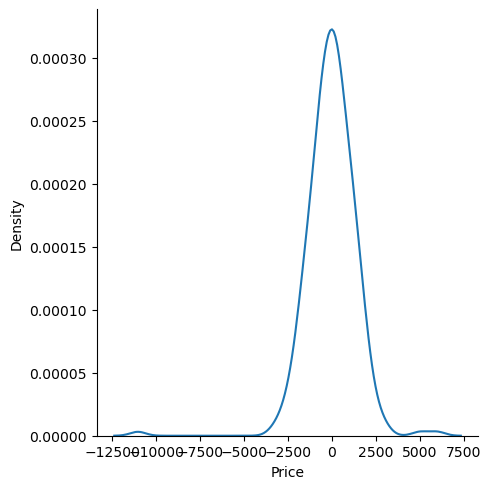

In [68]:
sns.displot(residual,kind='kde')

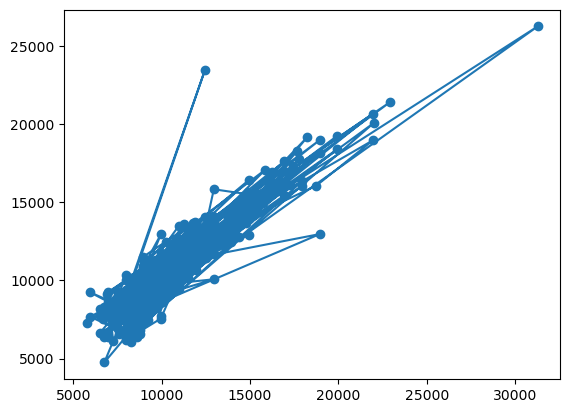

In [69]:
plt.scatter(y_test,y_pred)
plt.plot(y_test,y_pred)

Evaluation metrics;

5.Apply Lasso and Ridge methods on the model.

In [74]:
# Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(x_train, y_train)
lasso_pred = lasso_model.predict(x_test)
lasso_mse = mean_squared_error(y_test, lasso_pred)

# Ridge Regression
ridge_model = Ridge(alpha=0.1)  
ridge_model.fit(x_train, y_train)
ridge_pred = ridge_model.predict(x_test)
ridge_mse = mean_squared_error(y_test, ridge_pred)

print("Lasso MSE:", lasso_mse)
print("Ridge MSE:", ridge_mse)


Lasso MSE: 1930185.576276832
Ridge MSE: 1930281.7134448136


Graph Visualization

### Interview Questions:

#### 1.What is Normalization & Standardization and how is it helpful?

Ans;Normalization in data-science refers to the process of scalling numeric features to a common range,typically between 0 and 1.
The goal of normalization is to bring all the features into a similer scale,which is perticularly important for algorithms that are sensitive to the scale of the features

Standardization in data-science refers to the process of transforming data in such a way that it has mean of 0 and standard deviation of 1.
This process is also known as z-score normalization"""

#### 2.What techniques can be used to address multicollinearity in multiple linear regression?
Ans; Multicollinearity occurs when independent variables in a regression model are highly correlated with each other. 
This can cause issues in multiple linear regression, such as unstable coefficients estimates and difficulties in interpreting the importance of individual predictors.